# 1. problem statement: Predict whether the passenger of the titanic ship survived or not.

In [1]:

import pandas as pd

# 2. Read data: data is stored in  train and test in csv file so import them by using the pandas. 

In [2]:
train=pd.read_csv('train.csv')


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 3. Data cleaning: clean the data to make it usable

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#no need for name
train.drop('Name',axis=1,inplace=True)

In [8]:
train.duplicated().sum()

0

In [9]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
median=train['Age'].median()

In [12]:
#replacing age null values with the median
train['Age'].fillna(median,inplace=True)

In [13]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [14]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [15]:
#dropping the column cabin
train.drop('Cabin',axis=1,inplace=True)

In [16]:
train.shape

(891, 10)

In [17]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [18]:
train['Embarked'].fillna('S',inplace=True)

In [19]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [20]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [21]:
def gender(x):
    if x=='male':
        return 0
    else:
        return 1

In [22]:
train['Sex']=train['Sex'].apply(gender)

In [23]:
train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [24]:
#remove ticket from the  dataset
train.drop('Ticket',axis=1,inplace=True)

In [25]:
train.shape

(891, 9)

In [26]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
train['Embarked']=lb.fit_transform(train['Embarked'])

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int32  
dtypes: float64(2), int32(1), int64(6)
memory usage: 59.3 KB


# 4. Data analysis: analysis how data respond.


In [29]:
corr=train.corr()

In [30]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,0
2,3,1,3,1,26.0,0,0,7.9250,2
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,2


In [31]:
corr['Survived'].sort_values(ascending=False)

Survived       1.000000
Sex            0.543351
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Embarked      -0.167675
Pclass        -0.338481
Name: Survived, dtype: float64

<Axes: xlabel='Sex', ylabel='Survived'>

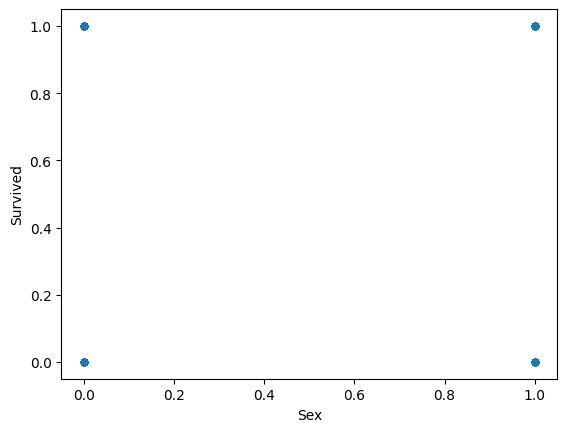

In [32]:
train.plot(kind='scatter',x='Sex',y='Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

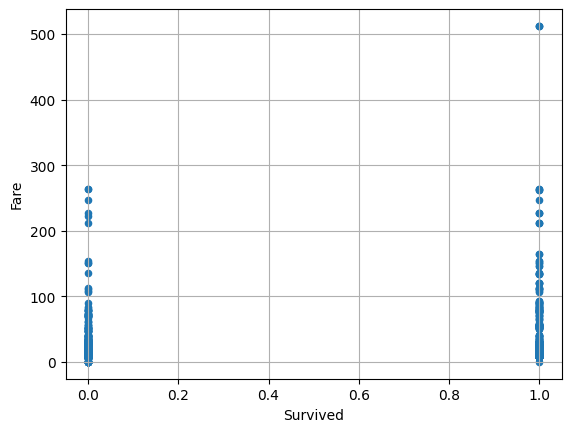

In [33]:
train.plot(kind="scatter",x="Survived",y="Fare",grid=True)

By correlation it is clear that the data is biased on the sex of the passenger and the survied is dependent on the sex of passenger

In [34]:
#automated eda
#!pip install dtale

In [35]:
import dtale

d=dtale.show(train)
d.open_browser()


# 5. Feature Engineering: Transform Data for the model

In [36]:
target=train['Survived']
features=train[['Sex','Fare']]
features

,Sex,Fare
0,0,7.2500
1,1,71.2833
2,1,7.9250
3,1,53.1000
4,0,8.0500
...,...,...
886,0,13.0000
887,1,30.0000
888,1,23.4500
889,0,30.0000


In [39]:
#scaling fare
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0,1))
features['Fare']=min_max.fit_transform(features[['Fare']]) 

C:\Users\ayush\AppData\Local\Temp\ipykernel_35252\2876443489.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
features['Fare'].max()

1.0

In [42]:
features['Fare'].min()

0.0

In [47]:
#to break into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.33)

In [50]:
x_test.shape

(295, 2)

# 5. Train and test model

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [56]:
def perform(model):
    y_pred=model.predict(x_test)
    print(f'Accuracy score: {accuracy_score(y_test,y_pred)}')
    print(f'Confusion Matrix: {confusion_matrix(y_test,y_pred)}')
    print(f'Precision score: {precision_score(y_test,y_pred)}')
    print(f'Recall score: {recall_score(y_test,y_pred)}')

In [57]:
from sklearn.linear_model import LogisticRegression
perform(LogisticRegression().fit(x_train,y_train))

Accuracy score: 0.7898305084745763
Confusion Matrix: [[140  23]
 [ 39  93]]
Precision score: 0.8017241379310345
Recall score: 0.7045454545454546


In [58]:
from sklearn.naive_bayes import GaussianNB
perform(GaussianNB().fit(x_train,y_train))

Accuracy score: 0.7796610169491526
Confusion Matrix: [[135  28]
 [ 37  95]]
Precision score: 0.7723577235772358
Recall score: 0.7196969696969697


In [62]:
from sklearn.neighbors import KNeighborsClassifier
perform(KNeighborsClassifier(3).fit(x_train,y_train))

Accuracy score: 0.7627118644067796
Confusion Matrix: [[135  28]
 [ 42  90]]
Precision score: 0.7627118644067796
Recall score: 0.6818181818181818


In [63]:
from sklearn.svm import SVC
perform(SVC().fit(x_train,y_train))

Accuracy score: 0.7898305084745763
Confusion Matrix: [[140  23]
 [ 39  93]]
Precision score: 0.8017241379310345
Recall score: 0.7045454545454546


In [64]:
from sklearn.tree import DecisionTreeClassifier
perform(DecisionTreeClassifier().fit(x_train,y_train))

Accuracy score: 0.7627118644067796
Confusion Matrix: [[142  21]
 [ 49  83]]
Precision score: 0.7980769230769231
Recall score: 0.6287878787878788


In [65]:
from sklearn.ensemble import RandomForestClassifier
perform(RandomForestClassifier().fit(x_train,y_train))

Accuracy score: 0.752542372881356
Confusion Matrix: [[139  24]
 [ 49  83]]
Precision score: 0.7757009345794392
Recall score: 0.6287878787878788


In [66]:
from sklearn.ensemble import ExtraTreesClassifier
perform(ExtraTreesClassifier().fit(x_train,y_train))

Accuracy score: 0.7593220338983051
Confusion Matrix: [[141  22]
 [ 49  83]]
Precision score: 0.7904761904761904
Recall score: 0.6287878787878788


In [70]:
from sklearn.ensemble import AdaBoostClassifier
perform(AdaBoostClassifier().fit(x_train,y_train))

Accuracy score: 0.7559322033898305
Confusion Matrix: [[140  23]
 [ 49  83]]
Precision score: 0.7830188679245284
Recall score: 0.6287878787878788


c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



In [71]:
from sklearn.ensemble import GradientBoostingClassifier
perform(GradientBoostingClassifier().fit(x_train,y_train))

Accuracy score: 0.7898305084745763
Confusion Matrix: [[143  20]
 [ 42  90]]
Precision score: 0.8181818181818182
Recall score: 0.6818181818181818


By accuracy score and by precision and recall model chosen is logistic regression

In [85]:
model=LogisticRegression().fit(x_train,y_train)

In [92]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)